In [17]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data=pd.read_csv('forestfires.csv')
data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [3]:
data=data.drop(['month','day'],axis=1)

In [4]:
mapping = {'small': 1, 'large': 2}

In [5]:
data = data.replace(mapping)

In [6]:
x = np.array(data.iloc[:,0:28])
y = np.array(data.iloc[:,28])

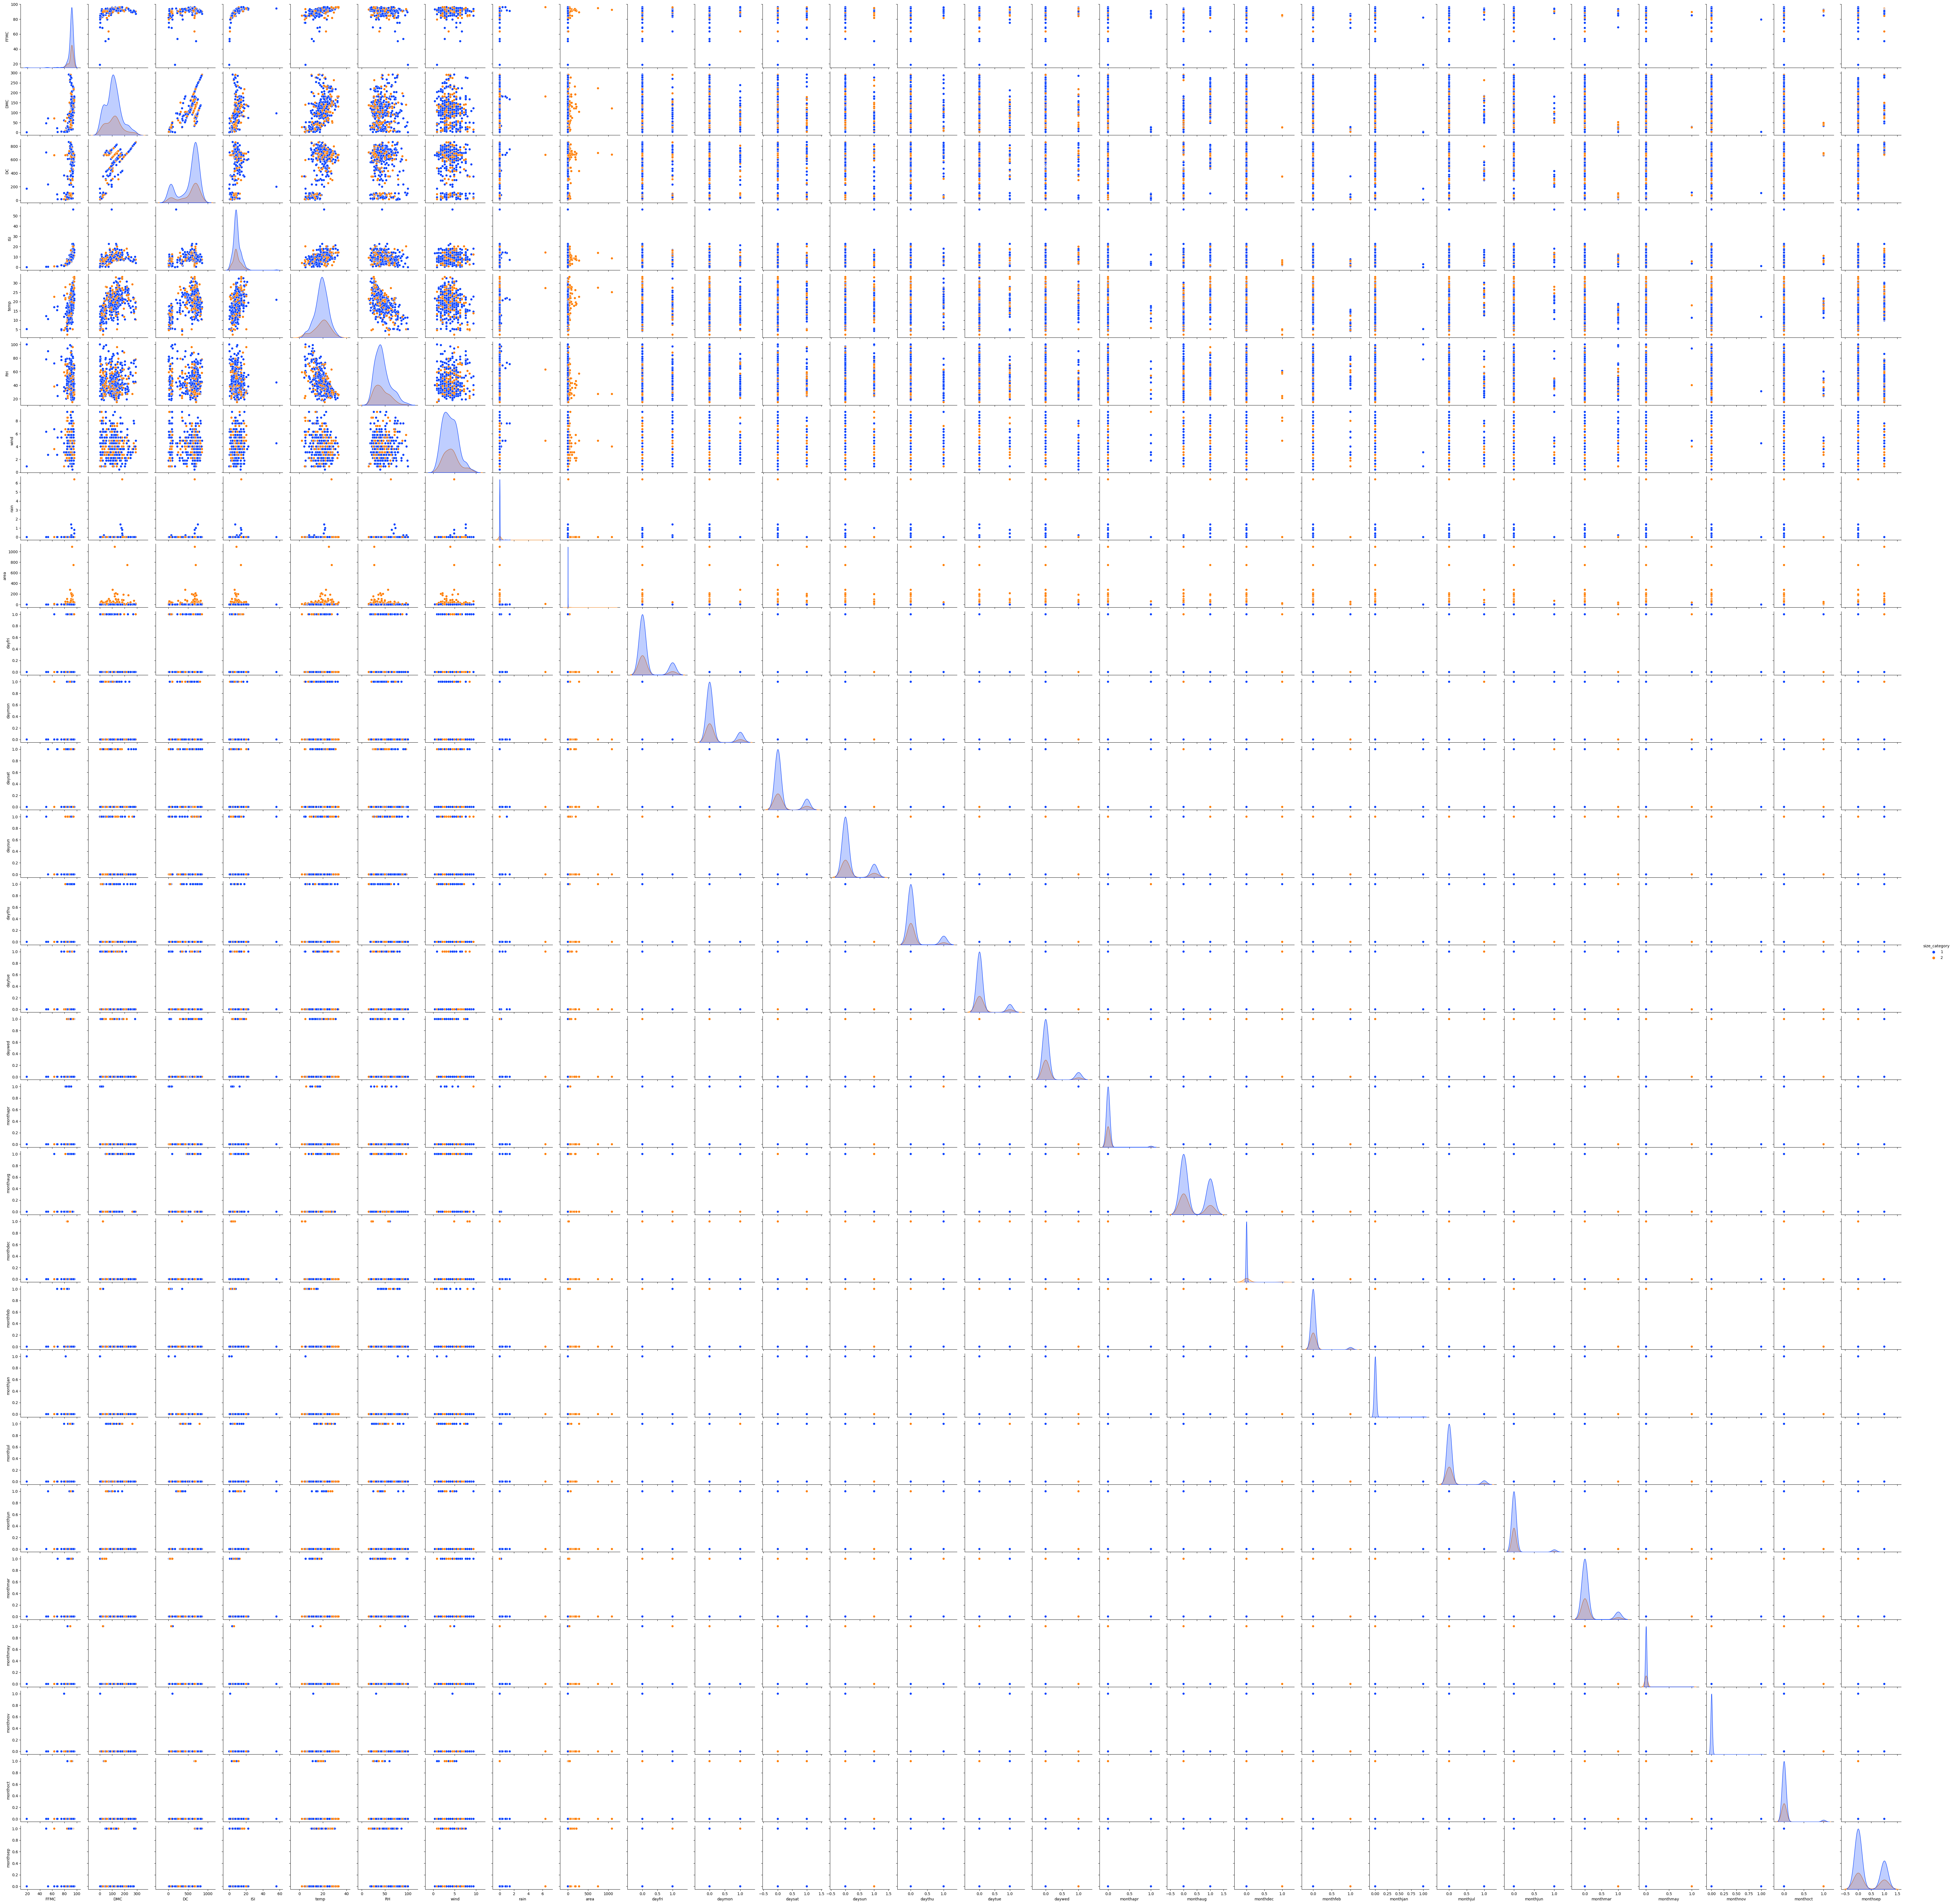

In [7]:
import seaborn as sns
sns.pairplot(data, hue="size_category",palette="bright")

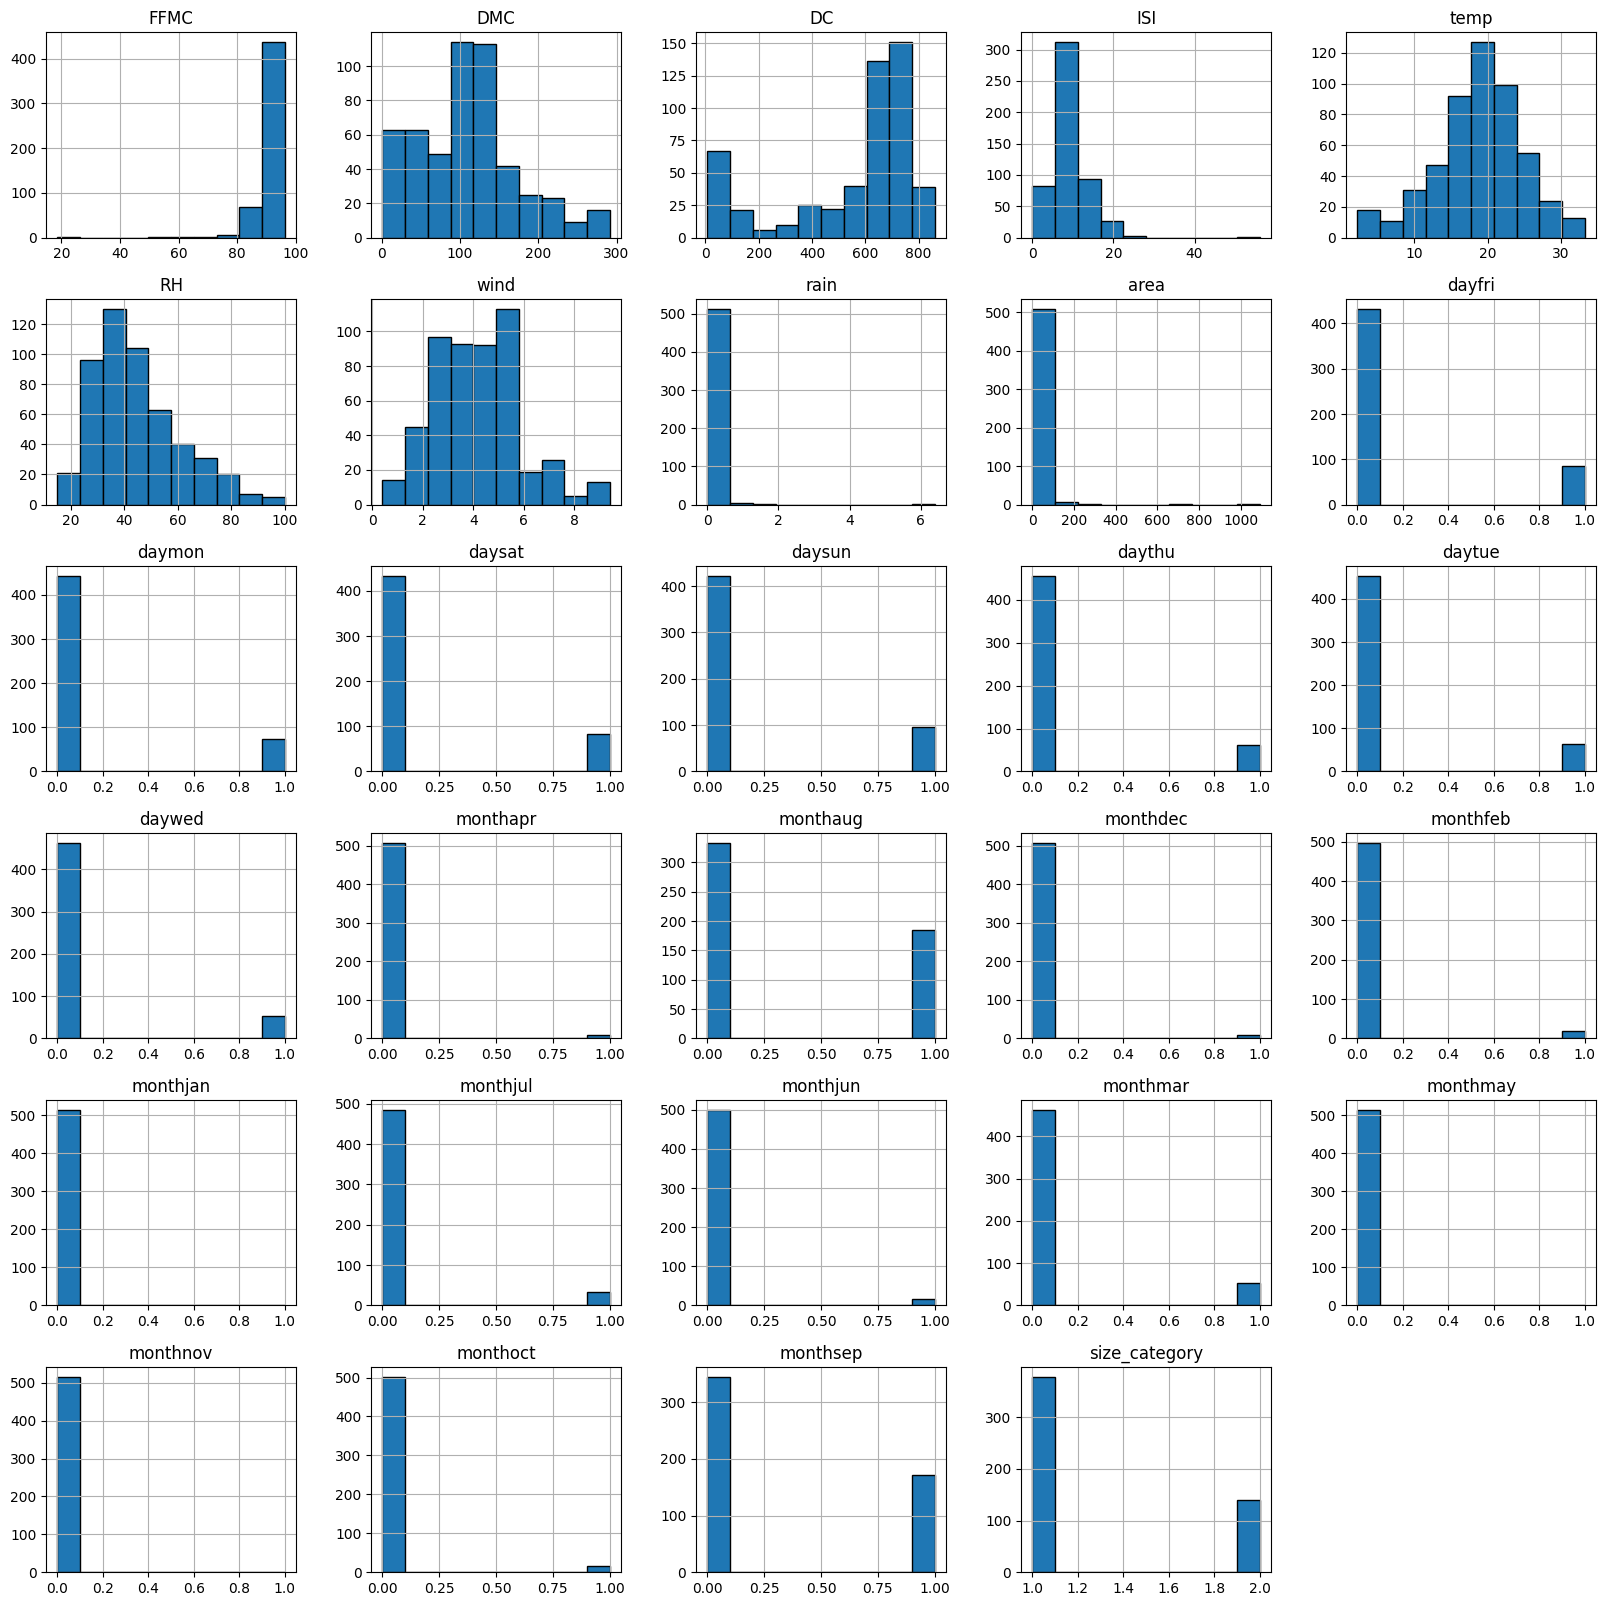

In [18]:
data.hist(edgecolor='black',figsize=(20,20),linewidth=1) 
plt.show()

In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3)

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((361, 28), (361,), (156, 28), (156,))

In [10]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 1/10; 1/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/10; 1/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 2/10; 1/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/10; 1/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 3/10; 1/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/10; 1/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 4/10; 1/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/10; 1/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 5/10; 1/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 6/10; 1/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 6/10; 1/10] END C=0.00

[CV 3/10; 6/10] END C=0.1, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/10; 6/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 4/10; 6/10] END C=0.1, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/10; 6/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 5/10; 6/10] END C=0.1, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 6/10; 6/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 6/10; 6/10] END C=0.1, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 7/10; 6/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 7/10; 6/10] END C=0.1, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 8/10; 6/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 8/10; 6/10] END C=0.1, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 9/10; 6/10] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV 9/10; 6/10] END C=

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [11]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'linear', 'gamma': 0.1, 'C': 0.001}, 0.9555555555555554)

In [12]:
clf1 = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv1 = GridSearchCV(clf1,param_grid,cv=10,verbose=300)
gsv1.fit(x_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.946 total time=   0.0s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.1s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

[CV 3/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 4/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 4/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 5/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 5/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 6/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 7/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 7/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 8/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 8/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=0.944 total time=   0.0s
[CV 9/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 

[CV 7/10; 12/24] END C=0.1, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 8/10; 12/24] START C=0.1, gamma=0.01, kernel=rbf............................
[CV 8/10; 12/24] END C=0.1, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 9/10; 12/24] START C=0.1, gamma=0.01, kernel=rbf............................
[CV 9/10; 12/24] END C=0.1, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 10/10; 12/24] START C=0.1, gamma=0.01, kernel=rbf...........................
[CV 10/10; 12/24] END C=0.1, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 1/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 2/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=0.889 total time=   0.0s
[CV 3/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[

[CV 7/10; 20/24] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 8/10; 20/24] START C=0.0001, gamma=0.5, kernel=rbf..........................
[CV 8/10; 20/24] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 9/10; 20/24] START C=0.0001, gamma=0.5, kernel=rbf..........................
[CV 9/10; 20/24] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 10/10; 20/24] START C=0.0001, gamma=0.5, kernel=rbf.........................
[CV 10/10; 20/24] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/10; 21/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 1/10; 21/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.946 total time=   0.0s
[CV 2/10; 21/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 2/10; 21/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.806 total time=   0.0s
[CV 3/10; 21/24] START C=0.0001, gamma=0.1, kernel=linear...............

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01],
                          'kernel': ['linear', 'rbf']}],
             verbose=300)

In [13]:
clf = SVC(kernel='linear',C=10)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 100.0


array([[107,   0],
       [  0,  49]], dtype=int64)

In [14]:
y_pred

array([2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [15]:
len(y_pred)

156